In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
!pip install keras-unet

In [4]:
import keras
from keras_unet.models import custom_unet

2023-04-06 22:05:09.553369: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/kunal.jain001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [5]:
DATAPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/npy_files'
images_file = os.path.join(DATAPATH, 'fly-mar-06-original-images.npy')

In [6]:
images = np.load(images_file)

In [7]:
images.shape

(56, 512, 512)

In [8]:
SRCPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/good_images/'

In [9]:
img_file_names = os.listdir(SRCPATH)

In [10]:
import mahotas as mh

In [11]:
test_slices = []


for img in img_file_names:
    if (img.endswith("tif")):
        a = mh.imread(os.path.join(SRCPATH, img))
        a = a.astype(np.float)
        a /= a.max()
        a *= 255
        a_cropped = a[1500:2012, 2968:3480].astype(np.float)

        test_slices.append(a_cropped)

/tmp/ipykernel_2531504/3445029487.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = a.astype(np.float)
/tmp/ipykernel_2531504/3445029487.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a_cropped = a[1500:2012, 2968:3480].astype(np.float)


In [12]:
test_slices = np.array(test_slices).astype(np.float64)

In [13]:
test_slices.shape

(253, 512, 512)

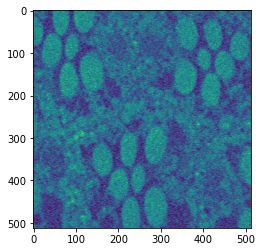

In [14]:
imshow(test_slices[100])

In [15]:
test_slices_expand_dims = np.expand_dims(test_slices, axis=3)

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import keras.optimizers
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance

In [17]:
MODELPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/pre_processing/models/04-06/'

In [18]:
loaded_model = keras.models.load_model(os.path.join(MODELPATH, '04-06-32-200-68-0.06.hdf5'), custom_objects={"iou": iou, "iou_thresholded": iou_thresholded})

2023-04-06 22:05:52.015786: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-06 22:05:52.370256: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:87:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-06 22:05:52.374616: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:90:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-06 22:05:52.374635: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-06 22:05:52.377471: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-06 

In [19]:
random_indices = np.random.choice(253, 10)

In [20]:
random_indices

array([101, 151, 232, 104, 230, 178,  48, 219, 139, 136])

In [21]:
ten_random_slices = np.empty([10, 512, 512, 1])
z = 0

for i in random_indices:
    ten_random_slices[z] = test_slices_expand_dims[i]
    z = z + 1

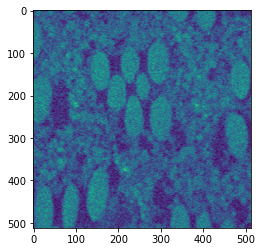

In [22]:
imshow(ten_random_slices[0])

In [23]:
ten_random_slices.shape

(10, 512, 512, 1)

In [24]:
import time

start = time.time()

y_predict = loaded_model.predict(ten_random_slices)

end = time.time()

print(end-start)

2023-04-06 22:05:54.633669: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-06 22:05:54.653167: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz
2023-04-06 22:06:00.909820: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-06 22:06:01.638340: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-06 22:06:02.396791: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-06 22:06:02.396812: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-06 22:06:02.396870: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modif

11.743919610977173


In [25]:
y_predict.shape

(10, 512, 512, 1)

In [26]:
y_predict = np.array(y_predict).astype(np.float64)

In [27]:
y_predict.shape

(10, 512, 512, 1)

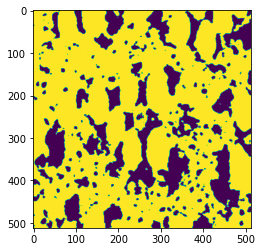

In [28]:
imshow(y_predict[3])

In [29]:
y_predict[3].shape

(512, 512, 1)

In [30]:
y_predict[3][:,:,0].shape

(512, 512)

In [31]:
a = y_predict[3,:,:,0] * 255

In [32]:
from PIL import Image

In [44]:
image = Image.fromarray((y_predict[0,:,:,0] * 255).astype(np.uint8))

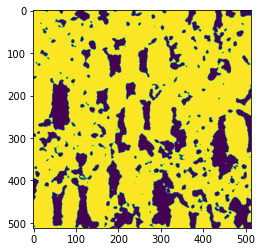

In [45]:
imshow(image)

In [35]:
min_value, max_value = image.getextrema()

In [36]:
new_max_value = 255
new_min_value = 0

In [37]:
scale = (new_max_value - new_min_value) / (max_value - min_value)

In [38]:
image = image.point(lambda i: (i - min_value) * scale + new_min_value)

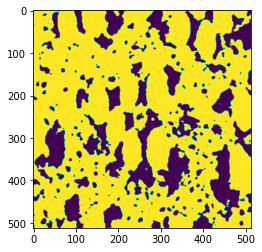

In [39]:
imshow(image)

In [40]:
y_predict[3] = np.expand_dims(np.array(image), axis=-1) / 255

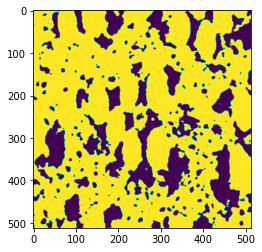

In [41]:
imshow(y_predict[3])